In [2]:
import os #library that make opening files easyer
import time #library thathelps with time things
import uuid #library that creates a unique identifier
import cv2 #library that allows us to work with sensors and cameras


In [3]:
IMAGES_PATH = os.path.join('data',"images")
number_images = 20  #number of images you will collect



In [4]:
print('a')

a


In [5]:
cap = cv2.VideoCapture(1) #establishing a connection to your video camera
for imgnum in range(number_images): #looping around number_images
    print('Collecting image {}'.format(imgnum))
    ret,frame = cap.read() #ret is return value - it show if you have captured successfully and frame is the image
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname,frame) #saves the image - frame to a fime - "images"
    cv2.imshow('frame', frame) #used for displaying images in a window
    time.sleep(0.5) #used to pause the execution of a program or script for a specified number of seconds

    if cv2.waitKey(1) & 0xFF == ord('q'): #sv2 break code, break out of the loop
        break
cap.release()
cv2.destroyAllWindows()

In [6]:
!labelme

'labelme' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import tensorflow as  tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [8]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [9]:
#good practice when using tensor flow for insuring you dont get too many 'out of memmory' errors
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
tf.config.list_physical_devices('GPU') #testing if your gpu is available
#go to 37:46 maybe you do something wrong

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg',shuffle=False) #getting images from data/images

In [12]:
images.as_numpy_iterator().next()

b'data\\images\\2039f92e-a23d-11ee-9a9b-d45d64b1977f.jpg'

In [13]:
def load_image(x):
    byte_img = tf.io.read_file(x) #returning byte decoded image
    img = tf.io.decode_jpeg(byte_img) #decoding the byte_img
    return img

In [14]:
images = images.map(load_image) #appling the load_image function to each image 

In [15]:
images.as_numpy_iterator().next() #now every images is type: tensorflow.data.ops

array([[[ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231],
        ...,
        [ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231]],

       [[ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231],
        ...,
        [ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231]],

       [[ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231],
        ...,
        [ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231]],

       ...,

       [[ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231],
        ...,
        [ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231]],

       [[ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231],
        ...,
        [ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231]],

       [[ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231],
        ...,
        [ 91, 190, 231],
        [ 91, 190, 231],
        [ 91, 190, 231]]

In [16]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [17]:
image_generator = images.batch(4).as_numpy_iterator() #grouping the images in batches of 4(batch = партида/група)
#as_numpy_iterator 

In [18]:
plot_images = image_generator.next() #what calling next  used to retrieve the next batch of images from the generator.

Figure(2000x2000)
[<Axes: > <Axes: > <Axes: > <Axes: >]
0
1
2
3


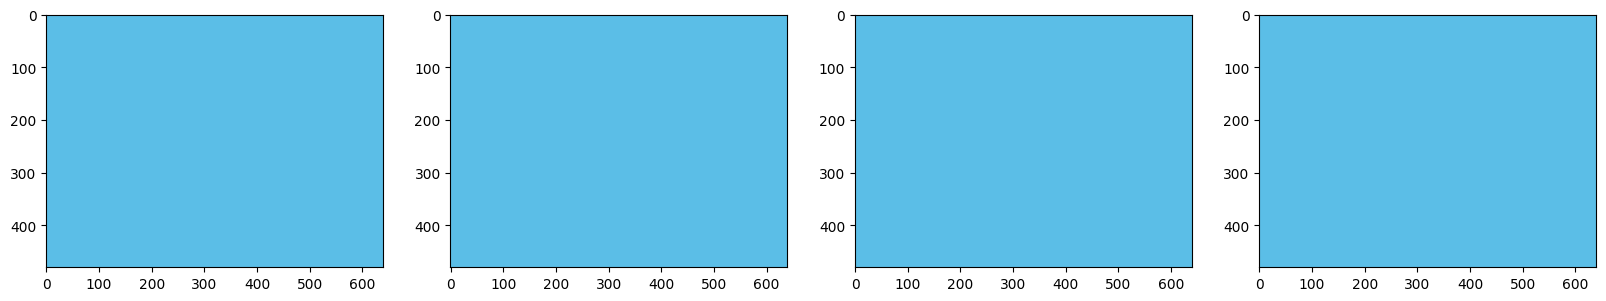

In [19]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))

# plt.subplots(ncols=4, figsize=(20, 20)): This part creates a grid of subplots. Here's what each parameter means:
# ncols=4: It specifies the number of columns in the subplot grid. In this case, there will be four columns.
# figsize=(20, 20): It specifies the size of the entire figure (width and height) in inches. In this case, the figure will have a width of 20 inches and a height of 20 inches.
# fig, ax = ...: This line unpacks the result of plt.subplots into two variables:
# fig: This is the figure object, representing the entire figure that contains all the subplots.
# ax: This is an array of AxesSubplot objects, where each element in the array represents a subplot. In this case, there are four subplots, corresponding to the four columns specified by ncols.
# After running this line of code, you have a fig object representing the entire figure and an ax array containing four subplot objects.
#These can be used to plot data in the subplots or customize the layout and appearance of the figure.




print(fig)
print(ax)
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
    print(idx)
plt.show()

# This code is using Matplotlib, a popular data visualization library in Python, to create a subplot with four columns and a specified size, 
# and then it iterates through a batch of images (plot_images) to display each image in a separate subplot.

# fig, ax = plt.subplots(ncols=4, figsize=(20,20)):
# plt.subplots(ncols=4, figsize=(20,20)): This part creates a figure (fig) and a set of subplots (ax). 
# It specifies that there should be 4 columns (ncols=4) in the subplot grid, and the size of the entire figure is set to 20x20 inches (figsize=(20,20)).
# fig, ax = ...: This line unpacks the result of plt.subplots into two variables: fig (the figure object) and ax (an array of AxesSubplot objects corresponding to each subplot).
# for idx, image in enumerate(plot_images)::
# This line starts a loop that iterates over each image in the plot_images batch. The enumerate function is used to get both the index (idx) and the image itself during each iteration.
# ax[idx].imshow(image):
# Inside the loop, ax[idx] refers to the subplot at the current index. It then uses the imshow method to display the current image in the specified subplot.
# plt.show():
# After the loop, this line displays the entire figure with all the subplots. This is the point where all the images are shown together in the subplots.
# So, when you run this code, you should see a Matplotlib figure with four columns, each containing an image from the plot_images batch. 
# This is a common pattern for visualizing multiple images in a grid using Matplotlib subplots.


In [20]:
# manualy assigned 63 images to train/images
# 14 images to test/images
# 13 images to val/images

In [21]:
for folder in ['train', 'test','val']:
    for file in os.listdir(os.path.join('data', folder,"images")):

        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists( existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

In [22]:
import albumentations as alb

In [23]:
#albumentation is used to change colors, flip, rotate and so on our images, so you can have a larger dataset
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations',label_fields=['class_labels']))

In [24]:
img = cv2.imread(os.path.join('data','train', 'images','f73fbd43-a198-11ee-a196-d45d64b1977f.jpg'))


In [25]:
with open(os.path.join('data', 'train', 'labels', 'f73fbd43-a198-11ee-a196-d45d64b1977f.json'), 'r') as f:
    label = json.load(f)

In [85]:
label["shapes"]

[{'label': 'face',
  'points': [[143.15789473684208, 123.15789473684212],
   [299.99999999999994, 316.8421052631579]],
  'group_id': None,
  'description': '',
  'shape_type': 'rectangle',
  'flags': {}}]

In [27]:
# Extract Coordinates and Rescale to Match Image Resolution
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]
# the cordinates now are in pascal_voc - unajusted for the size of the image

In [28]:
coords

[546.8421052631579, 238.42105263157896, 634.2105263157895, 405.7894736842105]

In [29]:
# grabing your raw cordinates - coords and dividing them by the width and height of the image
#dividing 546.84 / 640 || 238.42/480 and 634.21/640 || 405.78/480
coords = list(np.divide(coords, [640,480,640,480]))

# now the coords are in albumentations format

In [30]:
# running your image throught the augmentor 
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [31]:
# augmented is the image that has passed throught the augmentor
augmented

{'image': array([[[ 78,  72,  37],
         [ 77,  75,  37],
         [ 73,  72,  36],
         ...,
         [156, 116,   0],
         [156, 116,   0],
         [156, 117,   0]],
 
        [[ 81,  76,  39],
         [ 76,  70,  35],
         [ 76,  73,  37],
         ...,
         [156, 116,   0],
         [156, 116,   0],
         [156, 117,   0]],
 
        [[ 83,  77,  41],
         [ 74,  68,  33],
         [ 79,  73,  39],
         ...,
         [156, 116,   0],
         [156, 116,   0],
         [156, 117,   0]],
 
        ...,
 
        [[220, 204, 131],
         [221, 205, 132],
         [221, 205, 132],
         ...,
         [155, 148, 135],
         [155, 148, 135],
         [154, 147, 134]],
 
        [[221, 205, 132],
         [221, 205, 132],
         [221, 205, 132],
         ...,
         [155, 148, 135],
         [155, 148, 135],
         [154, 147, 134]],
 
        [[223, 205, 134],
         [223, 205, 134],
         [223, 205, 134],
         ...,
         [156, 149,

In [32]:
augmented['bboxes'][0][2:]

(1.0, 0.5123976608187134)

In [33]:
augmented['bboxes']

[(0.9507602339181287, 0.14046783625730996, 1.0, 0.5123976608187134)]

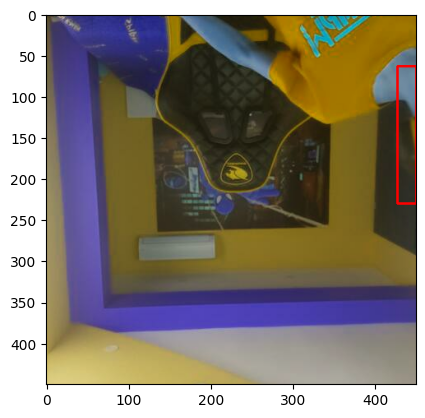

In [34]:
# visualizing the augmented image
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)), #top left cordinant - grabbing the first 2 values from the coords vector, the rescailing it to 450 x 450 to represent the size of the image
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),  #bottom right cordinant - grabbing the last 2 values from the coords vector, the rescailing it to 450 x 450 to represent the size of the image
                    (255,0,0),2) #specifting what the color is, and the 2 represents the thikness of the rectangle
plt.imshow(augmented['image'])

In [35]:
# doing augmentation for all images
# looping trought images in train , test and val folders , and grabbing every single image from them
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path): # checking if the image has face and recktangle in it. If the image hasnt got a face and recktangle it draws a recktangle at cords: [0,0,0.0001,0.0001]
          # if the image has a face then doing tranformation from pascal_voc to albumentations format
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        #creating 60 images per base image
        try: 
            for x in range(60):
                #running images trought augmentor
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                # putting the images in folder calld aug_data
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.06332236842105263, 0.5526315789473685, 0.0, 0.8153021442495128, 'face'].


In [36]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False) #grabbing images from aug_data/train/images
train_images = train_images.map(load_image) # using the function load_image on every image to load them
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120))) #resizing image to be 120px x 120px(that way you make less data that must pass the neuron network so it is more efficient)
train_images = train_images.map(lambda x: x/255) #scaling the image by 255

In [37]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [38]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)


In [39]:
train_images.as_numpy_iterator().next()

array([[[0.11170343, 0.31072304, 0.3538603 ],
        [0.1122549 , 0.30306372, 0.34944853],
        [0.10980392, 0.29803923, 0.35      ],
        ...,
        [0.95686275, 0.99607843, 1.        ],
        [0.94460785, 0.98382354, 0.9877451 ],
        [0.96476716, 0.9961397 , 0.9990809 ]],

       [[0.11783088, 0.32077205, 0.3658701 ],
        [0.11372549, 0.30882353, 0.3514706 ],
        [0.11323529, 0.30245098, 0.34117648],
        ...,
        [0.9607843 , 1.        , 0.99607843],
        [0.9420956 , 0.98131126, 0.9773897 ],
        [0.96844363, 1.        , 0.9998162 ]],

       [[0.14295343, 0.29252452, 0.30980393],
        [0.12941177, 0.2882353 , 0.32009804],
        [0.11801471, 0.30153185, 0.34031862],
        ...,
        [0.95686275, 0.99607843, 0.99215686],
        [0.9481005 , 0.9873162 , 0.9833946 ],
        [0.96617645, 1.        , 1.        ]],

       ...,

       [[0.        , 0.32941177, 0.47058824],
        [0.        , 0.32990196, 0.47058824],
        [0.        , 0

In [40]:
# Build Label Loading Function
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox'] #returns 2 arrays - the class(1 or 0) and the bbox

In [41]:
#Load Labels to Tensorflow Dataset
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16])) #looping throght eack filename and using the load_labels funcion on every label
# the file path to the json will be passed to the load_label function, so you can get the data from the label

In [42]:
#Load Labels to Tensorflow Dataset
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [43]:
#Load Labels to Tensorflow Dataset
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [44]:
train_labels.as_numpy_iterator().next()

(array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))

In [45]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3720, 3720, 840, 840, 780, 780)

In [46]:
train = tf.data.Dataset.zip((train_images, train_labels)) #combinig the images with the labels |  create a dataset by zipping together two existing datasets
train = train.shuffle(5000)
train = train.batch(8)# grouping by 8 (each batch contains 8images and 8 labels) 
train = train.prefetch(4)

In [47]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [48]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [49]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.1866, 0.2496, 0.6626, 0.75  ],
        [0.2651, 0.1733, 0.4568, 0.3757],
        [0.4275, 0.3418, 0.59  , 0.5312],
        [0.606 , 0.2487, 1.    , 0.6675],
        [0.3374, 0.2876, 0.624 , 0.616 ],
        [0.479 , 0.3564, 0.8438, 0.8047],
        [0.5996, 0.3594, 0.886 , 0.688 ],
        [0.857 , 0.1846, 1.    , 0.649 ]], dtype=float16))

In [50]:
#train.as_numpy_iterator allows you to iterate all batches
data_samples = train.as_numpy_iterator()

In [51]:
#grabbing th next batch
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


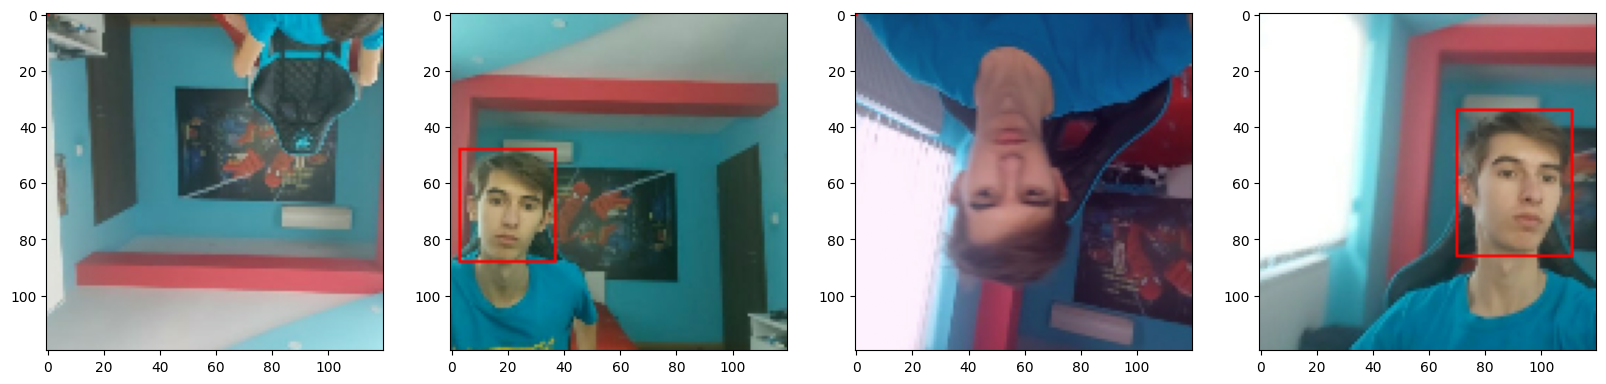

In [52]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 1)

    ax[idx].imshow(sample_image)

In [53]:
from tensorflow.keras.models import Model #base model class
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D #layers
from tensorflow.keras.applications import VGG16 #VGG16 is big neural network build for image detection and it is pretraind

In [54]:
# include_top is false because our model is combination between clasification and regretion model, 
#so you dont need the full vgg16, by makin the top=false you are gettting rid of the finall classification layer of the vgg16 and they will be subbed with your own layers  
vgg = VGG16(include_top=False)

In [55]:
# VGG16 is big neural network(with 15 000 parametars) , it already has many layers and it is build for image clasification. You will just fine tune it

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [56]:
#Build instance of Network
def build_model(): 
    #input layer, it uses the Input class and it is 120px x 120px x3px
    input_layer = Input(shape=(120,120,3))

    #passing the input layer trought the vgg16
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    #f1 value represents the output from the vgg16 layer
    f1 = GlobalMaxPooling2D()(vgg)              #1:36:30 for more info
    #f1 value goes to class1 layer that has 2048 units, with relu activation
    class1 = Dense(2048, activation='relu')(f1)
    #class 2 has 1 output(i will output 1 value) and it has a sigmoid activation(the value will be between 0 and 1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model(Regression model)
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    #regress2 has 4 outputs and sigmoid activation
    regress2 = Dense(4, activation='sigmoid')(regress1)

    #you got 2 outputs, classification and regretion
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [57]:
# creating a instace of build_model function
facetracker = build_model()

In [58]:
# with .summary you can take a look and see how the neural network looks
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [59]:
X, y = train.as_numpy_iterator().next()

In [60]:
X.shape

(8, 120, 120, 3)

In [61]:
#classes is the value prediction for is face in the picture
#coords are predictions for where must me the top rigth and bottom left corner of the rectangle
classes, coords = facetracker.predict(X)
classes,coords

(array([[0.4335604 ],
        [0.32280448],
        [0.51049453],
        [0.35651767],
        [0.47827277],
        [0.4306694 ],
        [0.46261832],
        [0.3512385 ]], dtype=float32),
 array([[0.46126983, 0.45364416, 0.5869082 , 0.5262781 ],
        [0.4106047 , 0.37487605, 0.5784698 , 0.55692756],
        [0.4705859 , 0.54874116, 0.6483701 , 0.51467776],
        [0.41040912, 0.40963724, 0.61433214, 0.61624175],
        [0.42197856, 0.52144057, 0.55728626, 0.5799274 ],
        [0.44912058, 0.4341911 , 0.48341897, 0.62206537],
        [0.471338  , 0.4900107 , 0.56372654, 0.5973261 ],
        [0.37547576, 0.500107  , 0.5983476 , 0.45735222]], dtype=float32))

In [62]:
# defining the learning rate 
# lr_decay is how much the learning rate is going to drop after an epoch
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [63]:
# using Adam optimizer, optimizer - how to apply gradient and backprop ot the network
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)



# The Adam optimizer is an optimization algorithm commonly used for training deep learning models. 
# It is an extension of the stochastic gradient descent (SGD) optimization algorithm and is designed to provide several advantages,
# such as adaptive learning rates and momentum. Here's an overview of what the Adam optimizer does:

# Adaptive Learning Rates: Adam adapts the learning rate for each parameter individually. 
# It computes individual adaptive learning rates for each parameter based on the historical gradients for that parameter. 
# This allows the algorithm to perform well on a wide range of models and tasks without manually tuning the learning rate.
# Momentum: Adam incorporates a momentum term, similar to other optimizers like SGD with momentum. 
# The momentum term helps accelerate the optimization process by accumulating past gradients and dampening oscillations during training.
# Bias Correction: Adam performs bias correction to the estimates of the first and second moments of the gradients.
# This correction is applied to account for the initialization bias of the moments at the beginning of training.
# Initialization: Adam initializes two moving averages for each parameter: the first moment (mean) and the second moment (uncentered variance) of the gradients.
# These moving averages are initialized to zero at the beginning of training.

In [64]:
def localization_loss(y_true, yhat):         
    # you are getting distance between the actual coordinant and the predicted coordinant
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    #calculating the actual hight of the box 
    h_true = y_true[:,3] - y_true[:,1] 
    #calculating the actual width of the box
    w_true = y_true[:,2] - y_true[:,0] 

    #calculating the predicted hight of the box 
    h_pred = yhat[:,3] - yhat[:,1] 
     #calculating the predicted width of the box
    w_pred = yhat[:,2] - yhat[:,0] 

    #От истинската ширина на кутията изваждам предположената ширина, после тази стойност я коренувам и събирам със коренуваната разлика на истинската височина минус предсказаната височина
    # tf.reduce_sum is reducing the value to a single outcome
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    #delta_coord + delta_size gives you the localization loss
    return delta_coord + delta_size

In [65]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [66]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.5687256>

In [67]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7113632>

In [68]:

regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.5687256>

In [7]:
# creating a new class FaceTracker and passing it trought Model
# when you are sub classing the model class from keras you need to have :
    # an init method
    # a compile method
    # a train step method
    # a call method
class FaceTracker(Model): 
    #the init method is where you can passs your initial parametars
    #passing the facetracker from the function above(here it says eyetracker but it is the facetracker)
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    #trought the complile method you pass your loss and your optimizer
    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        #setting the variables like class variables
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    #the reain_stepe is where the reaining is happening
    #train step is going to take 1 batch of data and is goind to train on that batch
    def train_step(self, batch, **kwargs): 
        #unpacking the batch to his X and y values
        # X are your preproccesd images
        X, y = batch

        #telling keras to start calculating each of the different functions witch are applied to this information 
        #tf.GradientTape is appling back propagation
        with tf.GradientTape() as tape: 
            #making a prediction with our model
            #the model returns your classes and coord
            classes, coords = self.model(X, training=True)

            #passing the classes and coordinates to their respective loss functions
            #y[0] - passing the values between 1 and 0
            #y[0] is the true and classes is the prediction
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            #addin the 2 losses to get 1 loss metric
            total_loss = batch_localizationloss+0.5*batch_classloss

            #calculating the greadient
            grad = tape.gradient(total_loss, self.model.trainable_variables)

        #appling your gradient to the optimizer and making gradient descent
        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        #retutning the losses
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    #test_step is triggerd when you pass through a validation data set
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

NameError: name 'Model' is not defined

In [80]:
# subclassing the model and trough that passing the neural network 
model = FaceTracker(facetracker)

In [81]:
model.compile(opt, classloss, regressloss)

In [82]:
#spcifing the log directory
logdir='logs'

In [83]:
#used for rewiwing the model after training
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [84]:
# model.fit is calling the model and triggering the train_step 
#when traing the model and assigning io to varialbe(hist), you can then see the training history
# it starts the treaining
hist = model.fit(train, epochs=100, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/100
465/465 [==============================] - 50s 100ms/step - total_loss: 0.9366 - class_loss: 0.3580 - regress_loss: 0.7576 - val_total_loss: 0.9217 - val_class_loss: 0.6411 - val_regress_loss: 0.6012
Epoch 2/100
465/465 [==============================] - 45s 93ms/step - total_loss: 0.2880 - class_loss: 0.1161 - regress_loss: 0.2299 - val_total_loss: 2.4408 - val_class_loss: 2.1544 - val_regress_loss: 1.3636
Epoch 3/100
465/465 [==============================] - 45s 93ms/step - total_loss: 0.1785 - class_loss: 0.0718 - regress_loss: 0.1426 - val_total_loss: 0.4887 - val_class_loss: 0.4539 - val_regress_loss: 0.2618
Epoch 4/100
465/465 [==============================] - 45s 93ms/step - total_loss: 0.1597 - class_loss: 0.0621 - regress_loss: 0.1287 - val_total_loss: 0.7902 - val_class_loss: 0.6492 - val_regress_loss: 0.4656
Epoch 5/100
465/465 [==============================] - 45s 93ms/step - total_loss: 0.1331 - class_loss: 0.0521 - regress_loss: 0.1070 - val_total_loss: 2.7

In [86]:
hist.history


{'total_loss': [0.8695847988128662,
  0.48167991638183594,
  0.01997165009379387,
  0.010597316548228264,
  0.006394098978489637,
  0.06406214088201523,
  0.47529149055480957,
  0.08173806965351105,
  0.5645188689231873,
  0.048895739018917084,
  0.004992413800209761,
  0.07893943041563034,
  0.09233856946229935,
  0.0016100257635116577,
  0.0051978640258312225,
  0.11772528290748596,
  0.30443012714385986,
  0.0014694173587486148,
  0.032480739057064056,
  0.0009287822176702321,
  0.002169133862480521,
  0.0018152376869693398,
  0.004192333668470383,
  0.024202188476920128,
  0.002366951433941722,
  0.0011873665498569608,
  0.000863361288793385,
  0.000826724455691874,
  0.0005890419706702232,
  0.034381426870822906,
  0.0016292904037982225,
  0.0020550466142594814,
  0.000593528151512146,
  0.0009871773654595017,
  0.0015936818672344089,
  0.024692345410585403,
  0.0008524433942511678,
  0.0006322420085780323,
  0.0007120060618035495,
  0.001909684739075601,
  0.0010955007746815681,


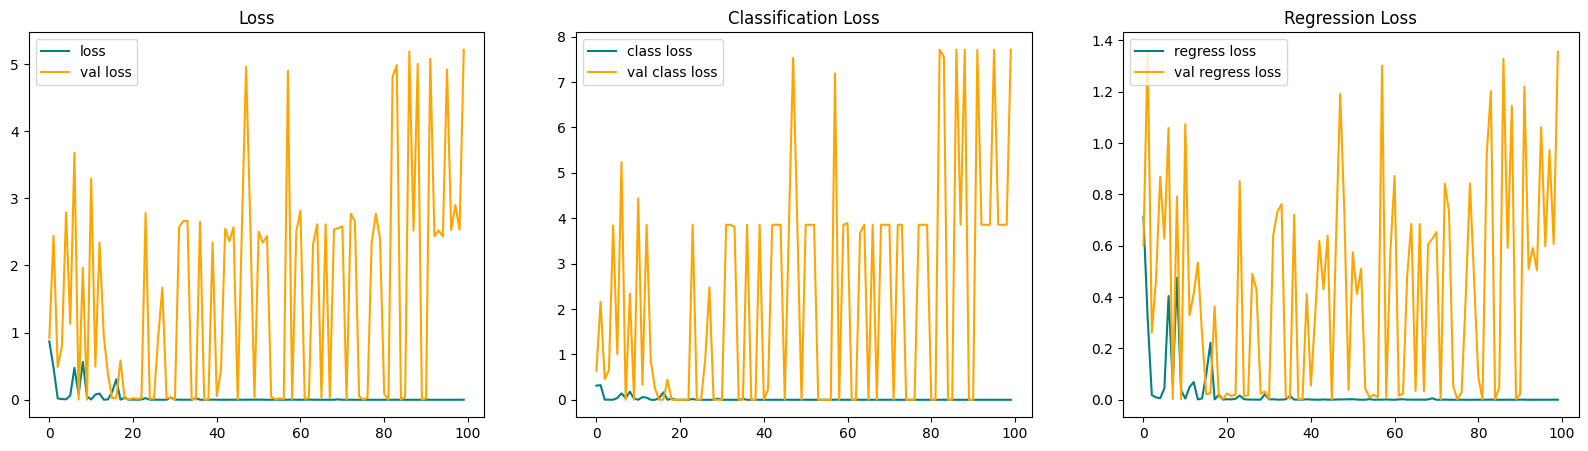

In [87]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [88]:
test_data = test.as_numpy_iterator()

In [89]:
test_sample = test_data.next()

In [90]:
yhat = facetracker.predict(test_sample[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


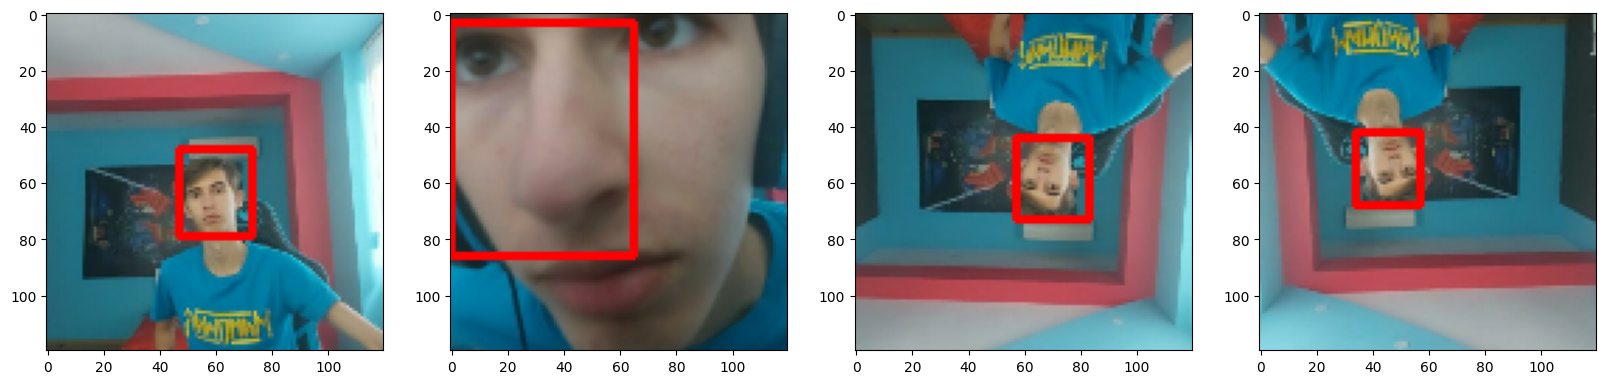

In [91]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [92]:
from tensorflow.keras.models import load_model

In [93]:
facetracker.save('facetracker.h5')

In [94]:
facetracker = load_model('facetracker.h5')

In [6]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    print(frame)
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[[[ 36 137 255]
  [ 36 137 255]
  [ 36 137 255]
  ...
  [ 36 137 255]
  [ 36 137 255]
  [ 36 137 255]]

 [[ 36 137 255]
  [ 36 137 255]
  [ 36 137 255]
  ...
  [ 36 137 255]
  [ 36 137 255]
  [ 36 137 255]]

 [[ 36 137 255]
  [ 36 137 255]
  [ 36 137 255]
  ...
  [ 36 137 255]
  [ 36 137 255]
  [ 36 137 255]]

 ...

 [[ 36 137 255]
  [ 36 137 255]
  [ 36 137 255]
  ...
  [ 36 137 255]
  [ 36 137 255]
  [ 36 137 255]]

 [[ 36 137 255]
  [ 36 137 255]
  [ 36 137 255]
  ...
  [ 36 137 255]
  [ 36 137 255]
  [ 36 137 255]]

 [[ 36 137 255]
  [ 36 137 255]
  [ 36 137 255]
  ...
  [ 36 137 255]
  [ 36 137 255]
  [ 36 137 255]]]


NameError: name 'facetracker' is not defined